In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading dataset
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
categorical_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                      'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

drop_col = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 
            'Id', 'SalePrice', 'GarageYrBlt']

drop_final = drop_col + categorical_col

In [7]:
#modifing features
dataset['AGE'] = 2019 - dataset['YearRemodAdd']
dataset['AGE_garage'] = 2019 - dataset['GarageYrBlt']

In [8]:
#filling and droping nan
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(value = "None")
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(value = "NA")
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(value = "NA")
dataset['Electrical'] = dataset['Electrical'].fillna(value = "SBrkr")
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(value = dataset['LotFrontage'].mean())
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(value = dataset['MasVnrArea'].mean())

dataset.dropna(subset = ['BsmtQual'], inplace= True)
dataset.dropna(subset = ['GarageType'], inplace= True)
dataset.shape

(1349, 83)

In [9]:
#seperating categorical features
df_cat = dataset[categorical_col].copy()
df = dataset.copy()
y = dataset.SalePrice
df.drop(drop_final, inplace = True, axis = 1)
df = df.reset_index(drop=True)
df.shape

(1349, 31)

In [10]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(drop = 'first')
X_onehot = onehot.fit_transform(df_cat).toarray()
X_onehot = pd.DataFrame(X_onehot)
X_onehot.shape

(1349, 208)

In [11]:
# final features
X = pd.concat([df, X_onehot], axis = 1)
X = X.values
X.shape

(1349, 239)

In [12]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [13]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [14]:
# importing model and cross val score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [15]:
# Linear Regression with L2 regularization
regressor = Ridge(alpha= 500)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train), regressor.score(X_test, y_test)

(0.8831996807957506, 0.8985491946483867)

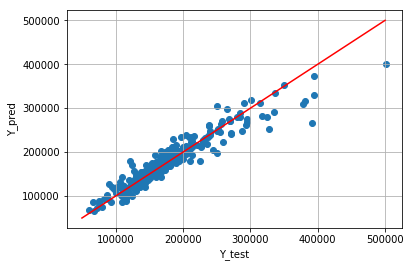

In [16]:
y_pred = regressor.predict(X_test)
plt.grid()
plt.scatter(y_test, y_pred)
plt.plot(range(50000, 500000),range(50000,500000), c='r')
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [17]:
regressor = Ridge(alpha= 200)
score = cross_val_score(regressor, X, y, cv= 10, n_jobs= -1, scoring= 'neg_mean_squared_error')
score

array([-4.68606219e+08, -5.92884997e+08, -7.77124124e+08, -1.36099147e+09,
       -1.12151461e+09, -1.08833811e+09, -6.29158958e+08, -8.37885564e+08,
       -3.48492773e+09, -5.88845520e+08])

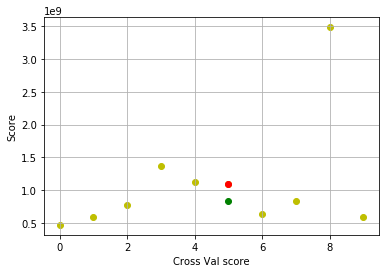

In [18]:
plt.grid()
plt.scatter(range(10), -score, c='y')
plt.scatter(5, -score.mean(), c='r')
plt.scatter(5, score.std(), c='g')
plt.xlabel("Cross Val score")
plt.ylabel("Score")
plt.show()

In [19]:
# Linear Regression with L1 Regularization
regressor1 = Lasso(alpha= 1000)
regressor1.fit(X_train, y_train)
regressor1.score(X_train, y_train), regressor1.score(X_test, y_test)

(0.883654506408873, 0.8914332812846988)

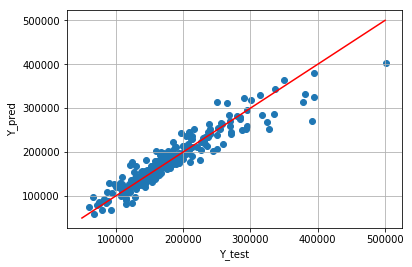

In [20]:
y_pred1 = regressor1.predict(X_test)
plt.grid()
plt.scatter(y_test, y_pred1)
plt.plot(range(50000, 500000),range(50000,500000), c='r')
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [21]:
regressor1 = Lasso(alpha= 1300)
score1 = cross_val_score(regressor1, X, y, cv= 10, n_jobs= -1, scoring= 'neg_mean_squared_error')
score1

array([-5.01877850e+08, -5.07656101e+08, -7.78090699e+08, -1.51541462e+09,
       -1.23859662e+09, -1.29951817e+09, -6.60849277e+08, -7.79843111e+08,
       -3.70698125e+09, -5.71999964e+08])

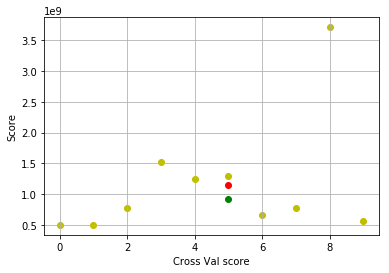

In [22]:
plt.grid()
plt.scatter(range(10), -score1, c='y')
plt.scatter(5, -score1.mean(), c='r')
plt.scatter(5, score1.std(), c='g')
plt.xlabel("Cross Val score")
plt.ylabel("Score")
plt.show()